In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import  seaborn as sns
from sklearn.datasets import make_moons 

In [12]:
x,y = make_moons(n_samples=1000, noise=0.2)

In [13]:
df = {"x1" : x[:,0], "x2": x[:,1], "y":y}

In [14]:
dataset = pd.DataFrame(df)
dataset

,x1,x2,y
0,0.678367,0.382427,0
1,0.375988,-0.107562,1
2,0.935062,0.411007,0
3,1.307969,-0.705706,1
4,1.418913,-0.504541,1
...,...,...,...
995,0.220558,1.327538,0
996,0.533998,0.852047,0
997,1.243949,0.123403,0
998,0.259828,0.736497,0


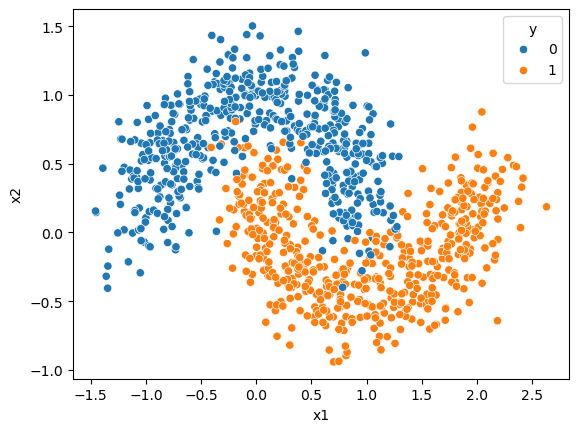

In [15]:
sns.scatterplot(x="x1",y="x2",data=dataset,hue="y")
plt.show()

In [45]:
x_a = dataset.iloc[:,:-1]
y_a= dataset["y"]

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
x_train , x_test ,y_train , y_test = train_test_split(x_a,y_a,test_size=0.2,random_state=42)

In [48]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [49]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
dt.score(x_train,y_train)*100 , dt.score(x_test,y_test)*100

(100.0, 95.0)

In [50]:
sv = SVC()
sv.fit(x_train, y_train)
sv.score(x_train,y_train)*100 , sv.score(x_test,y_test)*100

(96.75, 96.0)

In [51]:
gn = GaussianNB()
gn.fit(x_train,y_train)
gn.score(x_train,y_train)*100 , gn.score(x_test,y_test)*100

(86.125, 88.0)

In [52]:
from sklearn.ensemble import VotingClassifier

In [53]:
lt = [("dt1",DecisionTreeClassifier()),("sv1",SVC()),("gn1",GaussianNB())]

In [60]:
vc= VotingClassifier(lt,weights=[7,9,5])
vc.fit(x_train,y_train)

VotingClassifier(estimators=[('dt1', DecisionTreeClassifier()), ('sv1', SVC()),
                             ('gn1', GaussianNB())],
                 weights=[7, 9, 5])

In [61]:
vc.score(x_train,y_train)*100 , vc.score(x_test,y_test)*100

(97.375, 96.0)

In [63]:
pre = {"DT":dt.predict(x_test),"SV":sv.predict(x_test),"GN":gn.predict(x_test),"VC":vc.predict(x_test)}
pd.DataFrame(pre)

,DT,SV,GN,VC
0,0,0,0,0
1,1,1,1,1
2,1,1,1,1
3,0,0,0,0
4,1,1,1,1
...,...,...,...,...
195,1,1,1,1
196,1,1,0,1
197,1,1,1,1
198,1,1,1,1
